<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://media-exp2.licdn.com/dms/image/C4D22AQFi0OVtzMJ3OA/feedshare-shrink_800/0/1657887716623?e=1660780800&v=beta&t=d-O1tmLGC0phHv3oREvvz6I9akSJMJXhzU8ZyCZJZo0" width="200" alt="MT Learners"  />
    </a>
</p>

# Decision Tree

In this tutorial, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


### Importing required packages


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline


Let's download and import the data on China's GDP using *pandas* `read_csv()` method.



<a href="https://github.com/Mr-MeerMoazzam/Machine-Learning/blob/main/drugdata.csv" target="_blank">Download Dataset</a>

## Understanding the Data

### `drugdata.csv`:

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.


## Reading the data


In [2]:
df = pd.read_csv("drugdata.csv")

# take a look at the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

## Data Preprocessing

In [10]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [14]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [11]:
X=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
Y=df.Drug

As you can see, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [12]:

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>Y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [16]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.3, random_state=3)

In [17]:
X_train.shape

(140, 5)

In [18]:
X_test.shape

(60, 5)

In [19]:
y_train.shape

(140,)

In [20]:
y_test.shape

(60,)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [21]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>


In [22]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>y_pred</b>.
</div>


In [28]:
y_pred = drugTree.predict(X_test)

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
</div>


In [29]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


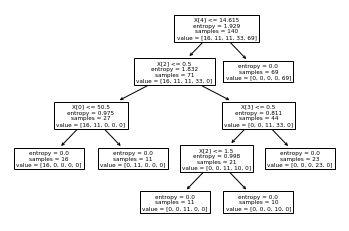

In [31]:
tree.plot_tree(drugTree)
plt.show()

### Thank you 
## Author

<a href="https://www.linkedin.com/in/meermoazzam/" target="_blank">Moazzam Ali</a>

<hr>

## <h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">MT Learners</a> 2022. All rights reserved. <h3/>
